Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4598 - loss: 0.7058
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5511 - loss: 0.6988
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5007 - loss: 0.6960
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5307 - loss: 0.6932
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5295 - loss: 0.6938
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5375 - loss: 0.6934
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5301 - loss: 0.6891
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5543 - loss: 0.6837
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5568 - loss: 0.6876
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5398 - loss: 0.6866


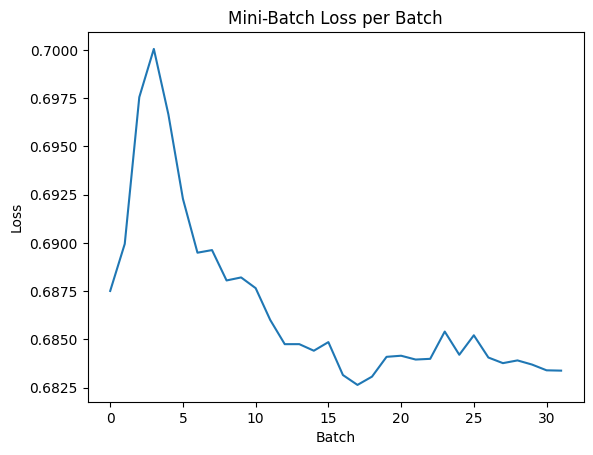

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

X_train = np.random.rand(1000, 20)
y_train = np.random.randint(0, 2, size=(1000, 1))

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

class BatchLossHistory(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        self.losses.append(logs['loss'])

    def on_epoch_begin(self, epoch, logs=None):
        self.losses = []

batch_loss_history = BatchLossHistory()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[batch_loss_history], verbose=1)

plt.plot(batch_loss_history.losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Mini-Batch Loss per Batch')
plt.show()